In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates
import os

## Read in data from loops

directory_path = r'/Users/rprocious/Waterlevels_CBI/CBI-2/Corrected_Data_Official/nesscanResult_removedBadNesdisRecords/Pier21'
dataframes = []


for filename in sorted(os.listdir(directory_path)):
    if filename.endswith('.csv'):

        file_path = os.path.join(directory_path, filename)
        
        df = pd.read_csv(
        file_path,
        parse_dates=[0],
        na_values=[-999, -99, 99, 'NA', 'RM'],
        engine='python'   
        )
        df.columns = ['station #','date', 'pwl',]
        dataframes.append(df)

p21 = pd.concat(dataframes, ignore_index=True)

p21['date'] = pd.to_datetime(p21['date'])


/var/folders/y3/cr8y1g617l16hvdtqnqzmgz80000gn/T/ipykernel_93703/4065788059.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(
/var/folders/y3/cr8y1g617l16hvdtqnqzmgz80000gn/T/ipykernel_93703/4065788059.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(


In [11]:
def third_diff(dataset):
    pwl = dataset['pwl']
    # Use pandas shift to vectorize calculation
    third_difference = pwl.shift(3) - 3*pwl.shift(2) + 3*pwl.shift(1) - pwl
    return third_difference.dropna().reset_index(drop=True)

values = third_diff(p21)
values = round(values,4)
values = values.to_numpy()
nan_array = np.full(3, np.nan)
new_arr = np.concatenate((nan_array, values))
p21.insert(3,'3D',new_arr)
p21['Spike flag'] = 0
mean = p21['3D'].mean()
std = p21['3D'].std()

outliers = (p21['3D'] < mean - 5*std) | (p21['3D'] > mean + 5*std)

p21.loc[outliers, 'Spike flag'] = 1

In [12]:
p21['pwl_3D'] = p21.loc[p21['Spike flag']==0,'pwl']
p21

,station #,date,pwl,3D,Spike flag,pwl_3D
0,022,1992-04-24 13:06:00,1.424,NaN,0,1.424
1,022,1992-04-24 13:12:00,1.418,NaN,0,1.418
2,022,1992-04-24 13:18:00,1.409,NaN,0,1.409
3,022,1992-04-24 13:24:00,1.431,-0.034,0,1.431
4,022,1992-04-24 13:30:00,1.443,0.041,0,1.443
...,...,...,...,...,...,...
2761649,022,2024-12-05 16:12:00,1.281,-0.008,0,1.281
2761650,022,2024-12-05 16:18:00,1.278,-0.004,0,1.278
2761651,022,2024-12-05 16:24:00,1.269,0.008,0,1.269
2761652,022,2024-12-05 16:30:00,1.264,-0.010,0,1.264


In [13]:
p21.idxmax()

station #     1843250
date          2761653
pwl           2169689
3D            2169690
Spike flag       3090
pwl_3D        2622247
dtype: int64

In [14]:
p21[2622225:2622260]

,station #,date,pwl,3D,Spike flag,pwl_3D
2622225,022,2023-04-29 03:30:00,2.014,-0.012,0,2.014
2622226,022,2023-04-29 03:36:00,2.031,-0.009,0,2.031
2622227,022,2023-04-29 03:42:00,2.059,0.011,0,2.059
2622228,022,2023-04-29 03:48:00,2.117,-0.019,0,2.117
2622229,022,2023-04-29 03:54:00,2.127,0.078,0,2.127
2622230,022,2023-04-29 04:00:00,2.086,0.003,0,2.086
2622231,022,2023-04-29 04:06:00,2.043,-0.049,0,2.043
2622232,022,2023-04-29 04:12:00,2.001,-0.003,0,2.001
2622233,022,2023-04-29 04:18:00,1.991,-0.031,0,1.991
2622234,022,2023-04-29 04:24:00,1.965,0.048,0,1.965


(-1.0, 9.0)

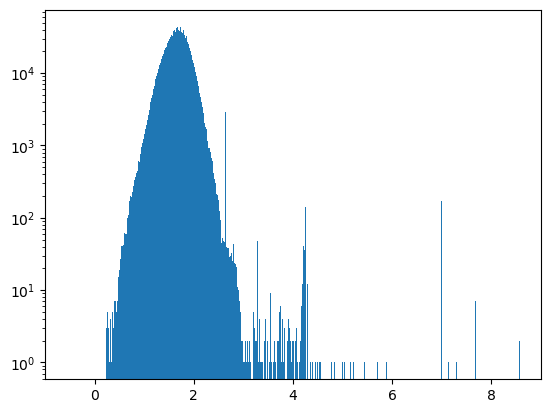

In [15]:
plt.hist(p21['pwl'],1000)
plt.yscale('log')
plt.xlim(-1,9)

(-1.0, 9.0)

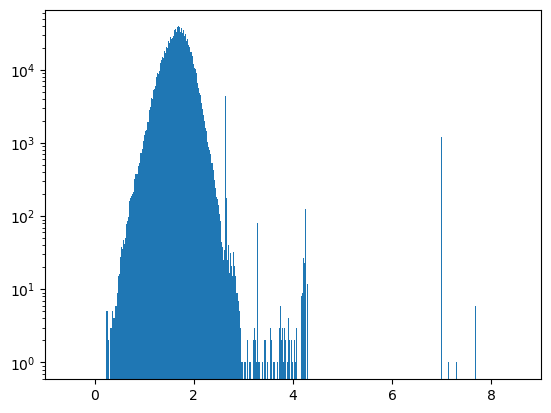

In [16]:
plt.hist(p21['pwl_3D'],1000)
plt.yscale('log')
plt.xlim(-1,9)

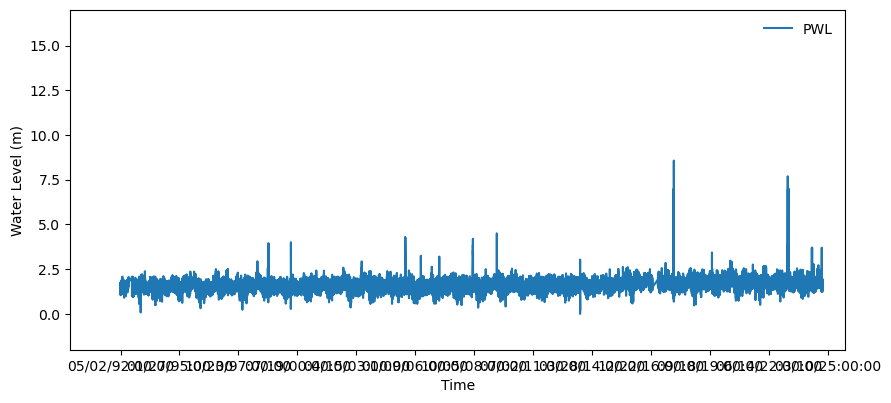

In [22]:
start_date = pd.to_datetime('1990/01/01 00:00')
end_date = pd.to_datetime('2025/12/30 03:30')

# Filter the data to only include the xlim range
filtered_data = p21[(p21['date'] >= start_date) & (p21['date'] <= end_date)]

# Plot the filtered data
plt.figure(figsize=(10,5))
plt.plot(filtered_data['date'], filtered_data['pwl'], label='PWL')


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%D:%H:%M'))

# Set tick locator for hourly intervals
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1000))
# Autofmt the x-axis labels
plt.gcf().autofmt_xdate()

plt.xticks(rotation=0)

for label in plt.gca().get_xticklabels():
    label.set_ha('center')  # Set horizontal alignment to center

# Adjust y-axis limits
plt.ylim(-2,17)

# Set x-axis limits
plt.xlim(start_date, end_date)

# Add legend and title
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Water Level (m)')

# Display the plot
plt.show()

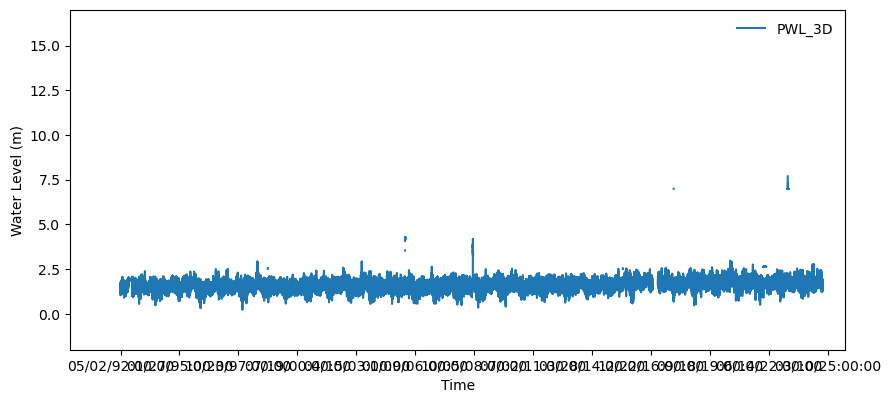

In [23]:
start_date = pd.to_datetime('1990/01/01 00:00')
end_date = pd.to_datetime('2025/12/30 03:30')

# Filter the data to only include the xlim range
filtered_data = p21[(p21['date'] >= start_date) & (p21['date'] <= end_date)]

# Plot the filtered data
plt.figure(figsize=(10,5))
plt.plot(filtered_data['date'], filtered_data['pwl_3D'], label='PWL_3D')


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%D:%H:%M'))

# Set tick locator for hourly intervals
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1000))
# Autofmt the x-axis labels
plt.gcf().autofmt_xdate()

plt.xticks(rotation=0)

for label in plt.gca().get_xticklabels():
    label.set_ha('center')  # Set horizontal alignment to center

# Adjust y-axis limits
plt.ylim(-2,17)

# Set x-axis limits
plt.xlim(start_date, end_date)

# Add legend and title
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Water Level (m)')

# Display the plot
plt.show()